# Setting

In [60]:
# home path
import sys, os
home_path = os.path.expanduser("~") + '/Desktop/Molecular_kaggle'
sys.path.append(home_path + '/py/')

In [61]:
# module
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import scipy
import lightgbm, xgboost
from tabulate import tabulate
from ggplot import *
import warnings
import collections
from scipy.optimize import minimize
from sympy import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #seabornライブラリを読み込み、スタイルをセットする
from numpy import linalg as la
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error

# my module 
import importlib
import boosting
import base
importlib.reload(gb)
importlib.reload(base)

# for instance
Process = base.Process()
LightGBM = boosting.LightGBM()

## Read csv

In [55]:
train_df, test_df, features = Process.read_data()

4658147 observations and 21 features in train set.
2505542 observations and 20 features in test set.
15 observations and 1 features in features set.


# LightGBM

- lightgbm

In [56]:
# parameters
param_lgb1 = Process.open_parameter(file_name = 'giba_param_lgb')
param_lgb1

{'num_leaves': 255,
 'objective': 'regression_l2',
 'max_depth': -1,
 'learning_rate': 0.15,
 'boosting': 'gbdt',
 'bagging_freq': 1,
 'sub_feature': 0.5,
 'sub_row': 0.75,
 'metric': 'mae',
 'verbosity': -1,
 'nthread': 4,
 'random_state': 831}

In [62]:
# model
with base.timer("Light GBM model"):
    lgb_val_pred, lgb_test_pred, lgb_importance = \
    LightGBM.lightgbm(train = train_df,
                                  test=test_df,
                                  features= features,
                                  param=param_lgb1,
                                  name="Lightgbm base model")

validation method: GroupKFold(n_splits=4) groups value: molecule_name
fold n°1
Training until validation scores don't improve for 200 rounds.
[200]	training's l1: 2.49977	valid_1's l1: 2.51997
[400]	training's l1: 2.47974	valid_1's l1: 2.51493
[600]	training's l1: 2.46535	valid_1's l1: 2.51342
Early stopping, best iteration is:
[527]	training's l1: 2.46963	valid_1's l1: 2.51313
fold n°2
Training until validation scores don't improve for 200 rounds.
[200]	training's l1: 2.51013	valid_1's l1: 2.5414
[400]	training's l1: 2.48786	valid_1's l1: 2.53439
[600]	training's l1: 2.47303	valid_1's l1: 2.53225
[800]	training's l1: 2.45997	valid_1's l1: 2.53048
Early stopping, best iteration is:
[776]	training's l1: 2.46087	valid_1's l1: 2.53033
fold n°3
Training until validation scores don't improve for 200 rounds.
[200]	training's l1: 2.50935	valid_1's l1: 2.52639
[400]	training's l1: 2.48838	valid_1's l1: 2.52075
[600]	training's l1: 2.47406	valid_1's l1: 2.5198
Early stopping, best iteration is:

In [63]:
# result
print("Lightgbm normal validation RMSE: %.4f" % \
      np.sqrt(mean_squared_error(train_df["scalar_coupling_constant"].values, lgb_val_pred)))
# submit
Process.submit(lgb_test_pred,tech = "lightgbm_sample_output1")

Lightgbm normal validation RMSE: 4.1050


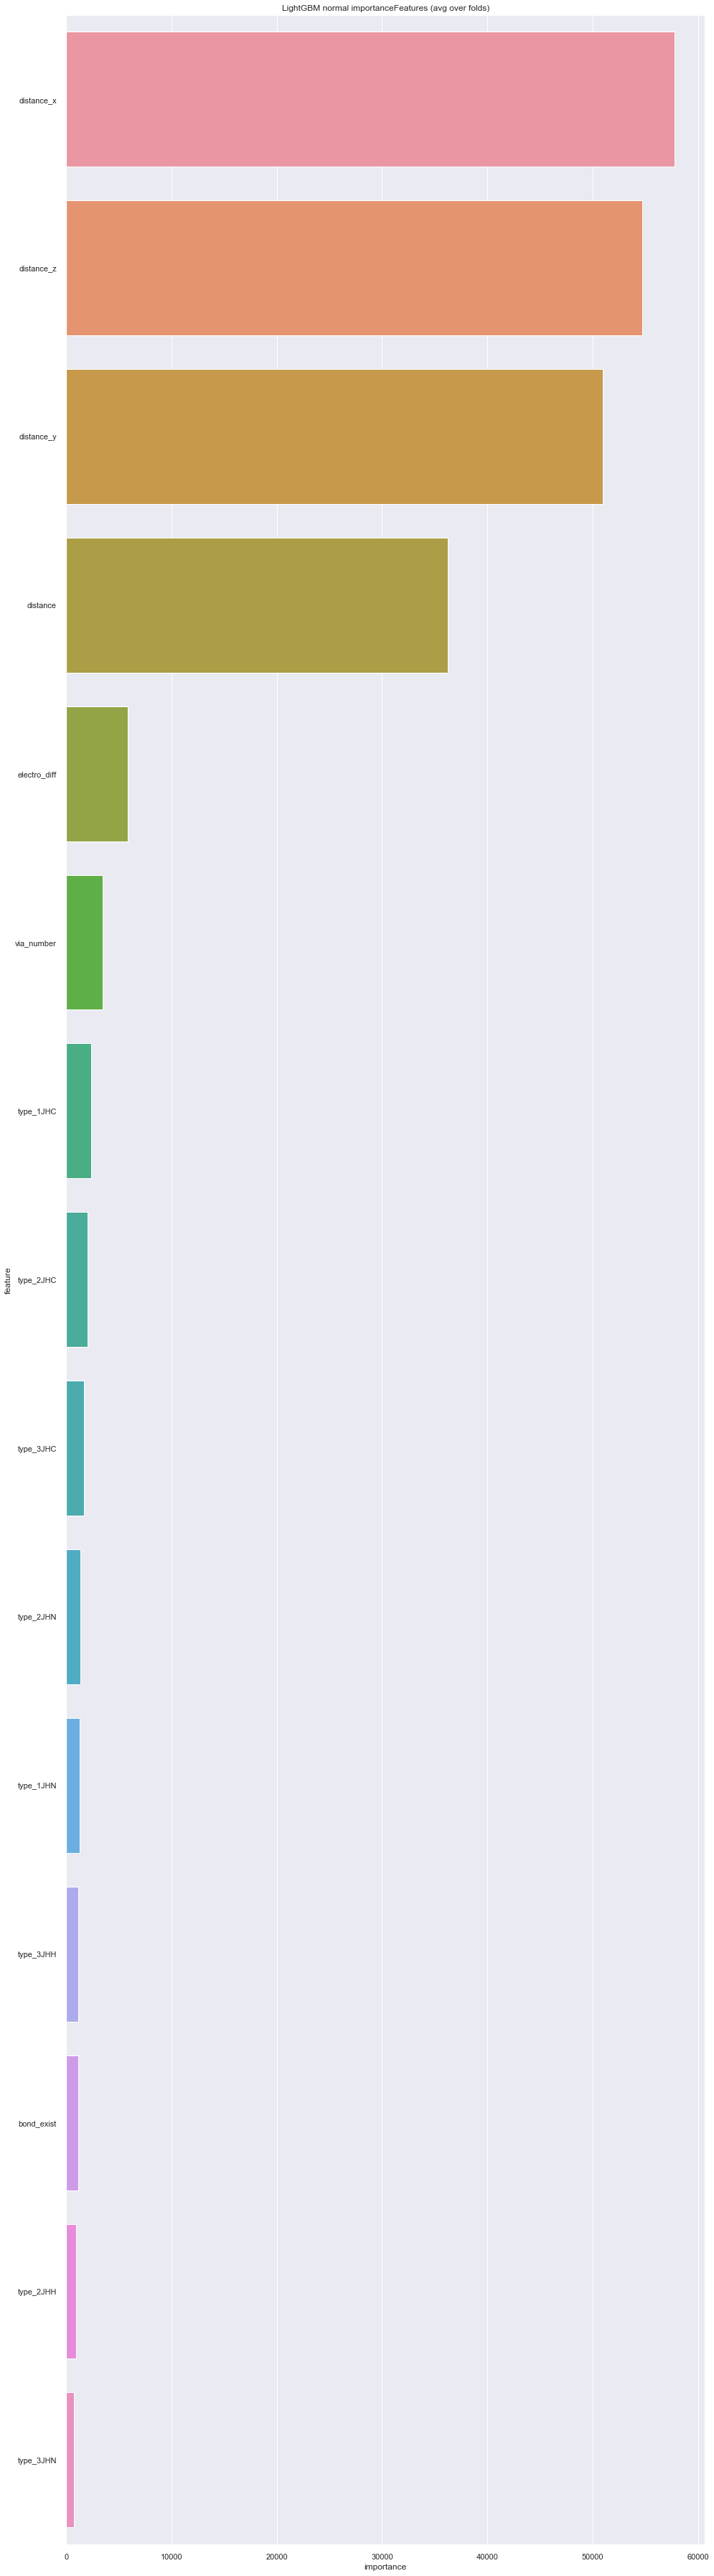

In [64]:
# importance 
Process.display_importances(lgb_importance,title="LightGBM normal importance",file_name = None)